# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.5
my_eth = 10

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_request = requests.get(btc_url).json()

#print(json.dumps(btc_request, indent = 4))

btc_price_cad= btc_request["data"]["1"]["quotes"]["CAD"]["price"]

#print(btc_price_cad)

# Fetch current ETH price

eth_request = requests.get(eth_url).json()

#print(json.dumps(eth_request, indent = 4))

eth_price_cad = eth_request["data"]["1027"]["quotes"]["CAD"]["price"]

#print(eth_price_cad)

# Compute current value of my crpto

my_btc_value = my_btc * btc_price_cad

my_eth_value = my_eth * eth_price_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.5 BTC is $65470.92
The current value of your 10 ETH is $29219.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2015-08-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Preview DataFrame
df_tickers.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-06-19 00:00:00-04:00  109.87  109.9000  109.74  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.0300  109.80  109.975  2010628.0   
2017-06-21 00:00:00-04:00  109.88  110.0400  109.88  109.980  1085301.0   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.95  110.050  1295361.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.98  110.070  1101304.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-06-19 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-06-20 00:00:00-04:00  244.25  244.26  242.99  243.04  39203167.0  
2017-06-21 00:00:00-04:00  243.43  243.59  242.41  242.95  42746920.0  
2017-06-22 00:00:00-04:00  242.97  243.53  242.64  242.83  32991335.0  
2017-06-23 00:00:00-04:00  242.91  243.51  242.47  243.16  45792641.0

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

share_df = pd.DataFrame()
for ticker in tickers:
    share_df[ticker] = df_tickers[ticker]["close"]
share_df.index = share_df.index.date
share_df

# Print AGG and SPY close prices
agg_close_price = share_df["AGG"]
spy_close_price = share_df["SPY"]
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2017-06-19    109.790
2017-06-20    109.975
2017-06-21    109.980
2017-06-22    110.050
2017-06-23    110.070
               ...   
2021-06-03    114.210
2021-06-04    114.665
2021-06-07    114.595
2021-06-08    114.820
2021-06-09    115.050
Name: AGG, Length: 1001, dtype: float64
Current SPY closing price: $2017-06-19       NaN
2017-06-20    243.04
2017-06-21    242.95
2017-06-22    242.83
2017-06-23    243.16
               ...  
2021-06-03    418.86
2021-06-04    422.57
2021-06-07    422.23
2021-06-08    422.27
2021-06-09    421.62
Name: SPY, Length: 1001, dtype: float64


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * share_df["SPY"][-1]
my_agg_value = my_agg * share_df["AGG"][-1]
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21081.00
The current value of your 200 AGG shares is $23010.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value

# Create savings DataFrame
# YOUR CODE HERE!

data = ["Crypto", crypto],["Shares",shares]
df_savings = pd.DataFrame(data, columns = ["Type", "Ammount"])
df_savings.set_index("Type",inplace = True)
# Display savings DataFrame
display(df_savings)

,Ammount
Type,
Crypto,94690.27544
Shares,44091.00000


<AxesSubplot:ylabel='Ammount'>

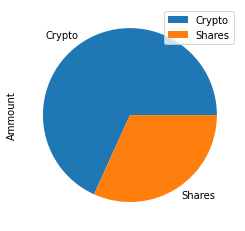

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = "Ammount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = (emergency_fund + df_savings["Ammount"][0] + df_savings["Ammount"][1]).round(2)
# Validate saving health

print(f"Currently, you have ${total_savings} in savings with ${emergency_fund} in Cash")


Currently, you have $174781.28 in savings with $36000 in Cash


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data= alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984386,1.008166,1.009822,0.993336,0.999848,1.000016,1.000087,1.004120,1.007519,0.996873,...,0.995506,1.006783,1.002840,1.001818,1.004455,1.001633,1.021548,0.988995,1.001312,0.999224
2,0.994551,1.014464,1.011677,0.990712,0.987498,1.000955,1.001801,0.998739,1.006845,0.999271,...,0.995660,1.020222,1.009310,1.002432,1.000193,0.998496,1.036995,1.000576,0.988750,0.997386
3,0.990421,1.013147,0.998061,0.979446,0.993738,0.993498,1.003943,0.999910,1.020567,1.005481,...,1.002818,1.021851,1.009061,0.998993,1.010075,0.981498,1.040435,1.004245,0.997035,1.010807
4,0.982153,1.008864,1.008559,0.975437,0.990433,1.001990,0.995697,1.002659,1.023943,1.017591,...,1.007197,1.018258,0.996063,0.996533,1.024377,0.981175,1.047199,1.005317,0.991673,1.023276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.975899,27.314009,10.949351,30.297235,24.489011,25.666558,46.683583,51.342218,11.097219,9.520667,...,20.197230,11.903002,29.111050,38.427913,28.402749,22.091454,10.774617,40.432419,36.285460,16.125909
7557,19.125816,27.205175,11.094003,30.070521,24.253976,25.716010,46.385616,51.054603,11.174315,9.457664,...,20.188205,11.965357,29.637826,38.016330,28.420822,22.291795,10.870562,40.659276,36.517170,15.939999
7558,19.272022,26.972053,11.201092,29.846796,24.360454,25.945020,46.483132,50.919244,11.143516,9.475529,...,20.193171,12.033154,29.669735,38.598962,28.595470,22.465759,10.852146,40.625966,36.963574,15.879747
7559,19.153103,27.156004,11.094023,30.446588,24.279581,25.636682,47.249330,51.129234,11.300492,9.523479,...,20.107024,11.952550,29.683752,38.627877,28.518330,22.473290,10.761173,40.886017,37.176853,16.048194


In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

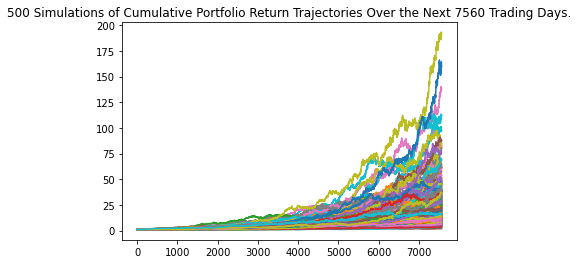

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
Line_plot = MC_sim.plot_simulation()

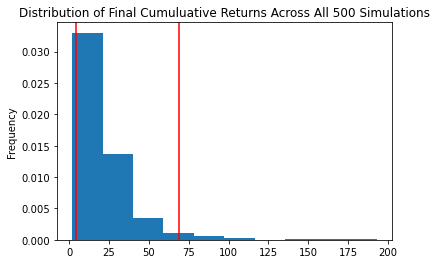

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sim_sum = MC_sim.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(sim_sum)

count           500.000000
mean             22.084140
std              19.126340
min               1.865050
25%              11.158719
50%              16.828975
75%              27.131818
max             192.786019
95% CI Lower      4.407544
95% CI Upper     69.062118
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = (sim_sum[8]* initial_investment).round(2)
ci_upper = (sim_sum[9]* initial_investment).round(2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88150.89 and $1381242.35


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = (sim_sum[8]*initial_investment).round(2)
ci_upper = (sim_sum[9]*initial_investment).round(2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132226.33 and $2071863.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_retire = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_retire.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984780,0.999198,1.010242,1.006674,1.009574,1.000493,1.004946,1.000719,1.004974,0.994406,...,0.992472,0.999342,0.996075,0.984326,0.990824,1.007588,1.000933,1.007081,1.001625,0.988706
2,0.971864,0.998707,1.016690,1.010412,1.000794,1.003698,1.006452,1.013697,0.996720,0.999003,...,0.992083,0.987555,0.998895,0.986215,0.986552,1.005462,0.980500,1.009619,1.007639,1.000736
3,0.960016,1.003392,1.023287,1.024151,1.003863,1.012246,0.999894,1.016040,0.990089,0.989716,...,1.000840,0.988496,0.997052,0.973930,0.988694,0.987991,0.980301,1.010608,1.005036,1.010778
4,0.962173,1.004117,1.031196,1.022840,1.012895,1.004601,0.991762,1.031315,0.984661,0.988949,...,1.002658,0.985475,0.995232,0.978410,0.971461,0.995959,0.976977,1.021879,0.999762,1.005531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.551498,1.722246,1.146413,1.446256,1.891717,2.018877,1.843352,1.623987,1.429626,1.476976,...,2.246261,2.541288,1.628012,1.813023,1.911120,1.205574,0.832806,1.000568,2.898595,1.318552
1257,1.570310,1.704870,1.149212,1.454417,1.867885,2.027927,1.838030,1.628712,1.425757,1.492487,...,2.250854,2.531667,1.645490,1.793595,1.927149,1.194593,0.842299,0.984879,2.899528,1.306596
1258,1.565389,1.714982,1.159682,1.467161,1.890773,2.026897,1.819805,1.648119,1.439414,1.521126,...,2.224925,2.536624,1.663628,1.778719,1.931383,1.192985,0.854039,0.982962,2.892945,1.310195
1259,1.592285,1.713754,1.161585,1.477057,1.877252,2.029590,1.831246,1.673251,1.433103,1.533486,...,2.237043,2.532545,1.663442,1.772368,1.927059,1.199295,0.847208,0.988243,2.913039,1.309758


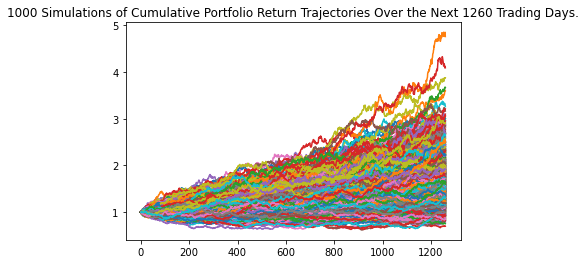

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
retire_line = mc_retire.plot_simulation()

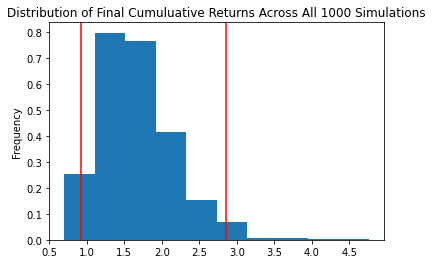

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
retire_dist = mc_retire.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
retire_sum = mc_retire.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(retire_sum)

count           1000.000000
mean               1.674393
std                0.496331
min                0.701041
25%                1.321032
50%                1.598196
75%                1.951822
max                4.756594
95% CI Lower       0.921532
95% CI Upper       2.851522
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 150000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = (retire_sum[8]*initial_investment).round(2)
ci_upper_five = (retire_sum[9]*initial_investment).round(2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $150000 in the portfolio over the next 5 years will end within in the range of $138229.81 and $427728.28


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999242,1.014713,0.995096,0.997964,0.988898,1.004008,0.996646,0.985284,0.999905,0.999991,...,0.985329,0.996264,0.999419,0.999783,1.006531,0.986950,1.002244,0.999101,0.993828,1.008077
2,0.999317,1.021367,1.002560,0.995423,0.977014,1.000425,0.999538,0.968671,1.004442,1.004413,...,0.983843,1.005642,1.004755,1.001571,0.991863,0.980016,0.997164,0.997667,0.982633,1.012522
3,0.991016,1.028571,0.989464,0.997865,0.983327,0.995066,1.018891,0.974827,1.006994,1.008647,...,0.987386,0.999690,0.996975,1.006262,0.991287,0.979776,0.987298,1.008558,0.986457,1.009647
4,0.993386,1.026998,0.987191,1.009689,0.990570,0.988526,1.021891,0.980616,1.002455,0.998768,...,0.982362,0.981913,1.002897,1.015264,0.987255,0.982940,0.984564,1.008822,0.987244,1.016823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.608250,1.602894,1.106323,1.035261,2.195981,9.585405,4.631903,3.755018,2.030589,1.769779,...,1.747492,3.403383,3.051244,2.482529,3.474413,1.090452,2.242702,2.962299,2.170245,1.880340
2517,2.600629,1.599848,1.114114,1.035872,2.188644,9.607787,4.627754,3.785396,2.022412,1.780274,...,1.772305,3.396479,3.034657,2.468626,3.447736,1.085162,2.258733,2.951491,2.176740,1.889216
2518,2.619210,1.627795,1.111829,1.044186,2.202946,9.696457,4.663700,3.800893,2.005953,1.780875,...,1.762002,3.342724,3.026259,2.482232,3.411097,1.088355,2.293556,2.927013,2.210628,1.898023
2519,2.596999,1.610079,1.118969,1.057833,2.191098,9.814461,4.686225,3.861286,2.008642,1.781653,...,1.764374,3.378551,3.029834,2.482764,3.416935,1.076332,2.308744,2.978975,2.194570,1.889144


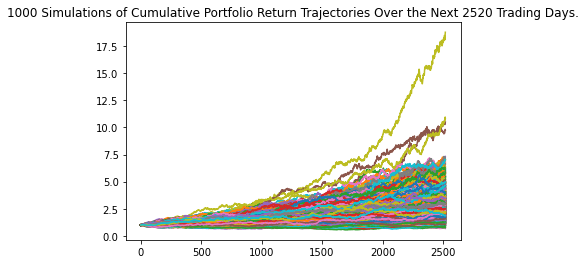

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_10 = mc_10.plot_simulation()

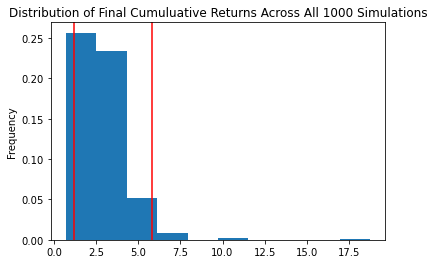

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_10 = mc_10.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_10 = mc_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(sum_10)

count           1000.000000
mean               2.850095
std                1.321605
min                0.683346
25%                2.012554
50%                2.578132
75%                3.440215
max               18.776081
95% CI Lower       1.170674
95% CI Upper       5.828020
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = (sum_10[8]*initial_investment).round(2)
ci_upper_ten = (sum_10[9]*initial_investment).round(2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $58533.69 and $291401.02
